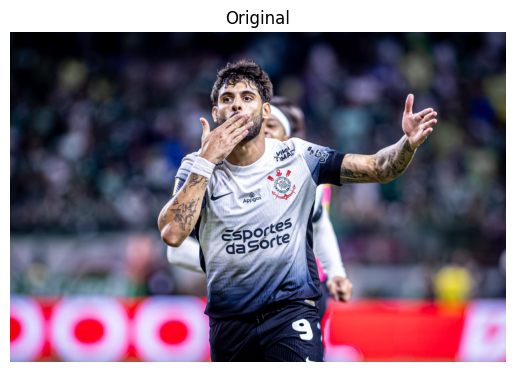

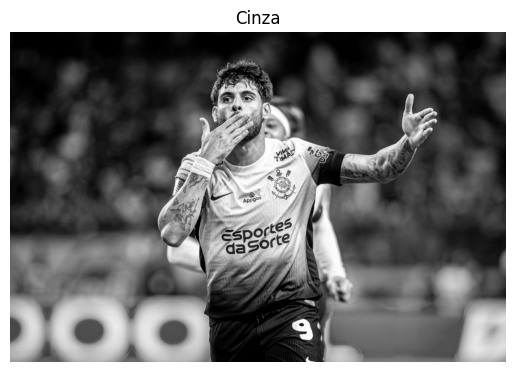

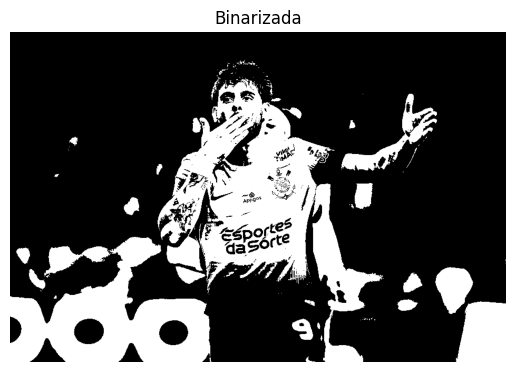

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def ler_foto(caminho):
    with open(caminho, 'rb') as f:
        formato = f.readline().strip()
        if formato != b'P6':
            raise ValueError('Erro')

        def ler_linha_sem_comentario():
            linha = f.readline()
            while linha.startswith(b'#'):
                linha = f.readline()
            return linha

        dimensoes = ler_linha_sem_comentario()
        largura, altura = map(int, dimensoes.split())

        max_valor = int(ler_linha_sem_comentario())

        pixels_bin = f.read()
        pixels = []
        for i in range(0, len(pixels_bin), 3):
            r = pixels_bin[i]
            g = pixels_bin[i+1]
            b = pixels_bin[i+2]
            pixels.append((r, g, b))

    return pixels, largura, altura, max_valor

def salvar_foto(caminho, pixels, largura, altura, max_valor=255):
    with open(caminho, 'wb') as f:
        f.write(b'P6\n')
        f.write(f'{largura} {altura}\n'.encode())
        f.write(f'{max_valor}\n'.encode())
        for r, g, b in pixels:
            f.write(bytes([r, g, b]))

def converter_para_cinza(pixels):
    cinza = []
    for r, g, b in pixels:
        gray = int(0.3*r + 0.59*g + 0.11*b)
        cinza.append((gray, gray, gray))
    return cinza

def binarizar(pixels_cinza, limiar=128):
    binaria = []
    for r, g, b in pixels_cinza:
        val = 255 if r >= limiar else 0
        binaria.append((val, val, val))
    return binaria

def mostrar_imagem(pixels, largura, altura, titulo='Imagem'):
    arr = np.array(pixels, dtype=np.uint8).reshape((altura, largura, 3))
    plt.imshow(arr)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# ============ Execução =============

entrada = 'imagem.ppm'     

pixels, largura, altura, max_val = ler_foto(entrada)

cinza = converter_para_cinza(pixels)
binaria = binarizar(cinza, limiar=128)

salvar_foto('cinza.ppm', cinza, largura, altura, max_val)
salvar_foto('binaria.ppm', binaria, largura, altura, max_val)

mostrar_imagem(pixels, largura, altura, 'Original')
mostrar_imagem(cinza, largura, altura, 'Cinza')
mostrar_imagem(binaria, largura, altura, 'Binarizada')
